In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error,r2_score
import tkinter as tk
from tkinter import messagebox

In [2]:
# Read dataset 
df = pd.read_csv('NFLX.csv')

In [3]:
# Split data into train and test sets
train, test = train_test_split(df, test_size=0.2)

In [4]:
# Define features and target variables
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values
y_train = train['Close'].values
y_test = test['Close'].values

In [5]:
# Standardize input features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# Define the ANN model architecture
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [8]:
# Train the model
history = model_ann.fit(x_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

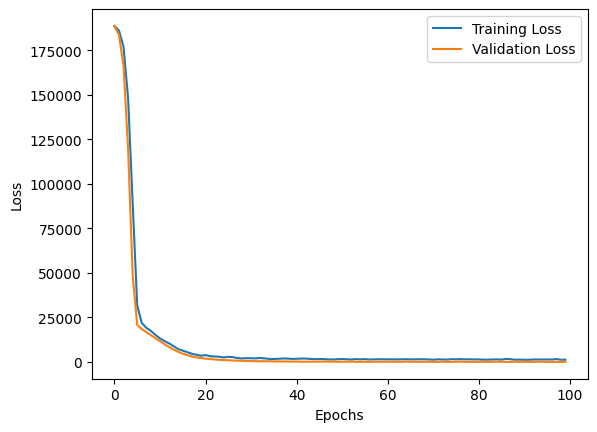

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
# Predictions on the test set
y_pred = model_ann.predict(x_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)  #difference between the predicted values and the actual values
print("Median Absolute Error:", medae)#For each data point, calculate the absolute difference between the predicted value and the actual value then Calculate the median of all the absolute differences
print("R2 score:", r2)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error: 41.870051250779824
Mean Absolute Error: 5.072628829120901
Median Absolute Error: 4.076233227539063
R2 score: 0.996214805672832


In [11]:
# Evaluate the model on test set
loss = model_ann.evaluate(x_test_scaled, y_test)
print(f'Test Loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.2539 
Test Loss: 41.87004852294922


In [12]:
# Function to predict stock price
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = np.array([open_price, high_price, low_price, volume]).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    predicted_price = model_ann.predict(input_data_scaled)
    return predicted_price[0]

In [13]:
# User interaction for prediction
user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))

In [14]:
# Predict using user input
predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
print(f"Predicted Close Price: {predicted_stock_price}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Close Price: [259.19904]


In [15]:
# Calculate MSE on test set
mse = model_ann.evaluate(x_test_scaled, y_test)
print(f'Test MSE: {mse}')



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.2539 
Test MSE: 41.87004852294922


In this modified code:

- Input features are standardized using StandardScaler.
- The model architecture is enhanced with dropout layers to reduce overfitting.
- Learning rate of the Adam optimizer is adjusted to 0.001.
- Training and validation loss curves are plotted to monitor model performance.
- The model is evaluated on the test set to assess its performance.
- User interaction for prediction remains the same.


- Standardizing input features ensures that they are on a similar scale. This can help the optimization algorithm converge faster during training

- Avoidance of Biased Learning: When features are on different scales, the model might give more weight to features with larger magnitudes

- Dropout layers are a regularization technique used in neural networks to reduce overfitting. Overfitting occurs when a model learns to memorize the training data instead of generalizing well to unseen data. Dropout helps prevent this by randomly dropping (setting to zero) a fraction of the input units during training.

- During Training:
At each training iteration, dropout randomly sets a fraction of the input units to zero with a specified dropout rate (typically between 0.2 and 0.5).
The dropout rate determines the probability of dropping each neuron. For example, if the dropout rate is 0.2, each neuron has a 20% chance of being dropped during training.
Dropping neurons essentially creates a different architecture at each iteration, as different neurons are dropped each time.
The weights of the remaining neurons are scaled during training to compensate for the dropped neurons, ensuring that the total input to each layer remains approximately constant.

In [16]:
def on_predict():
    try:
        # Get user input from entry fields
        user_open = float(entry_open.get())
        user_high = float(entry_high.get())
        user_low = float(entry_low.get())
        user_volume = float(entry_volume.get())
        
        # Predict using user input
        predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
        
        # Show predicted price in a message box
        messagebox.showinfo("Prediction", f"Predicted Close Price: {predicted_stock_price}")
        messagebox.showinfo("ACC", f"accuracy of model: {round(r2_score(y_test,y_pred), 3) * 100}")
        
    except Exception as e:
        print("Exception occurred:", e)  # Print the exception for debugging
        # Show error message if input is invalid
        messagebox.showerror("Error", "Please enter valid numerical values for all fields.")

In [18]:
#Here GUI Starts
root = tk.Tk()
root.title("Stock Price Prediction")


root.geometry("600x200")
root.config(bg="lightblue")

header = tk.Label(root,text="NETFLIX Pricing",bg="lightblue",
     foreground="black",font=("Arial",15,"bold"))
header.grid(row=0,column=2, pady=5)
frame1= tk.Frame(root,bg="lightblue")
frame1.grid()

# Create labels and entry fields for user input
label_open = tk.Label(root, text="Open Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_open.grid(row=1, column=0,pady=10)
entry_open = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_open.grid(row=1, column=1,pady=10)

label_high = tk.Label(root, text="High Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_high.grid(row=1, column=2,pady=10)
entry_high = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_high.grid(row=1, column=3,pady=10)

label_low = tk.Label(root, text="Low Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_low.grid(row=2, column=0,pady=10)
entry_low = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_low.grid(row=2, column=1,pady=10)

label_volume = tk.Label(root, text="Volume:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_volume.grid(row=2, column=2,pady=10)
entry_volume = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_volume.grid(row=2, column=3,pady=10)




# Create a predict button
predict_button = tk.Button(root, text="Predict",bg="green",activebackground="blue",
borderwidth=3,font=("Arial",15,"bold"), command=on_predict)
predict_button.grid(row=4,column=2)

# Start the GUI application
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
